<center><h1>Shah_Shrey_HW2</h1></center>

Name: Shrey Shah<br>Github Username: shreyshah97<br>USC ID: 5061063668

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, pairwise
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from tabulate import tabulate

Get the Cycle Power Plant Data Set

In [2]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx', engine='openpyxl')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### (b) Exploring the data

#### i. rows and columns

In [3]:
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:  9568
Columns:  5


##### There are total 9568 rows in the data which represent the samples or observations of data, and they consist of 5 columns with the values of the different variables like Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP), and Relative Humidity (RH) while the last column (PE) is for predicting the net hourly electrical energy output of the plant.

#### ii. pairwise scatterplots of all the varianbles

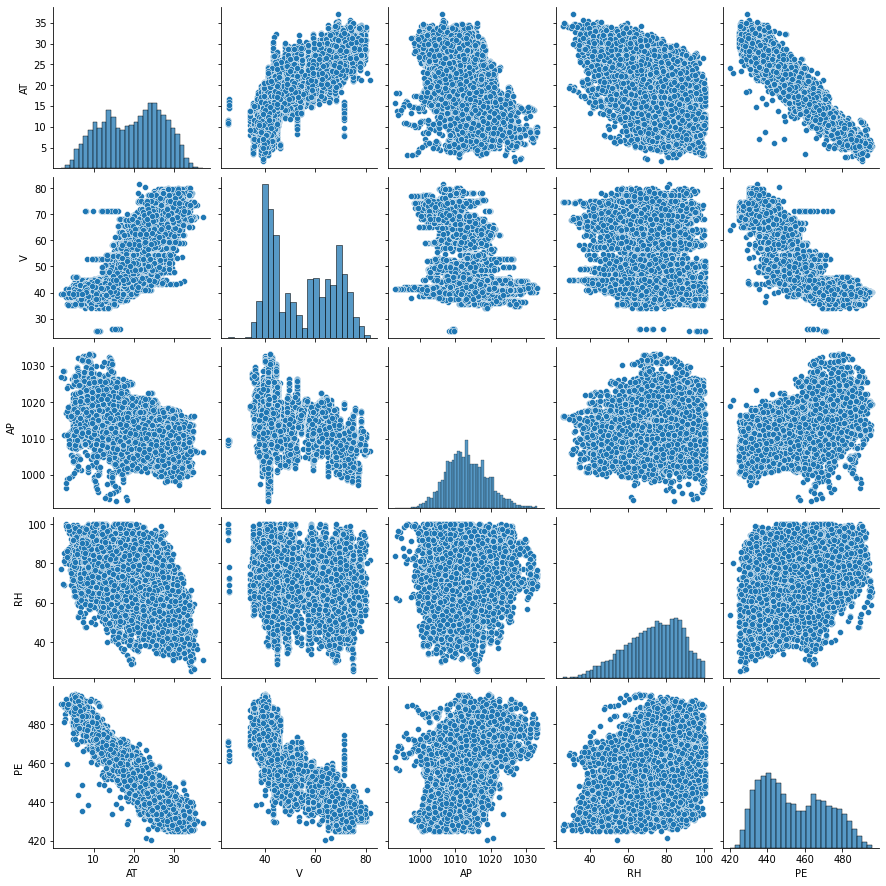

In [4]:
sb.pairplot(df)

From the above scatterplots, we can observe that:<br>
(a) the values of PE vs. AP, and PE vs. RH have broader scatter plots, indicating less correlation between the values. <br>
(b) In contrast, the plots of PE vs. AT, and PE vs. V is slimmer and with negative slope, indicating negative stronger correlation between the values.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [5]:
stats_df = df.describe()
stats_df.loc['median'] = df.median()
stats_df.loc['range'] = df.max()-df.min()
stats_df.loc['iqr'] = stats_df.loc['75%']-stats_df.loc['25%']
print(stats_df.loc[['mean', 'median', 'range', '25%', '75%', 'iqr'],:])

               AT          V           AP         RH          PE
mean    19.651231  54.305804  1013.259078  73.308978  454.365009
median  20.345000  52.080000  1012.940000  74.975000  451.550000
range   35.300000  56.200000    40.410000  74.600000   75.500000
25%     13.510000  41.740000  1009.100000  63.327500  439.750000
75%     25.720000  66.540000  1017.260000  84.830000  468.430000
iqr     12.210000  24.800000     8.160000  21.502500   28.680000


### (c) Simple Linear Regression

In [6]:
def outlier_cooks(model, n):
    cooks = model.get_influence().cooks_distance
    return np.where(cooks[0] > 4/n)

def plot_graph(x, y, y_pred, outlier_idx, col_name):
    fig, axes = plt.subplots(figsize=(12, 7))
    with plt.style.context('ggplot'):
        axes.scatter(np.delete(x, outlier_idx), np.delete(y, outlier_idx), alpha=0.3, label="Data point")
        axes.scatter(x[outlier_idx], y[outlier_idx], label="Outliers")
        axes.plot(x, y_pred, "tab:red", label="Regression Result")
    axes.set_title(f"Simple Linear Regression for {col_name}")
    axes.set_xlabel(col_name)
    axes.set_ylabel("PE")
    axes.legend()
    plt.show()

linear_coefficients = []
def fit_model_and_summarize(col_name):
    print(f"\nSummarizing Regression fit for {col_name}\n")
    y = df["PE"].to_numpy()
    x = df[col_name].to_numpy()
    x_constant = sm.add_constant(x, prepend=False)
    model = sm.OLS(y, x_constant).fit()
    print(model.summary())
    outlier_idx = outlier_cooks(model, len(df))
    linear_coefficients.append(model.params[0])
    y_pred = model.predict(x_constant)
    plot_graph(x, y, y_pred, outlier_idx, col_name)
    outliers_tuple = np.vstack((x[outlier_idx], y[outlier_idx]))
    return pd.DataFrame(outliers_tuple), np.delete(x, outlier_idx), np.delete(y, outlier_idx)

#### AT vs PE


Summarizing Regression fit for AT

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:29:37   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2

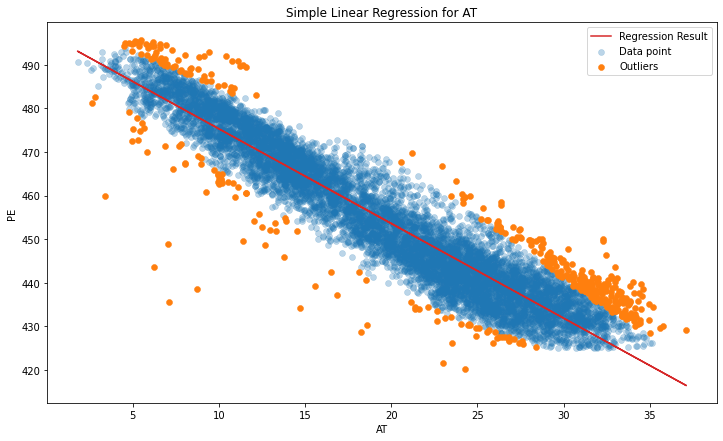

416


In [7]:
outlier_AT, new_x, new_y = fit_model_and_summarize("AT")
print(len(outlier_AT.T))

In [8]:
x_constant = sm.add_constant(new_x, prepend=False)
model = sm.OLS(new_y, x_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.047e+05
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:29:38   Log-Likelihood:                -27302.
No. Observations:                9152   AIC:                         5.461e+04
Df Residuals:                    9150   BIC:                         5.462e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.2336      0.007   -323.549      0.0

Results:
1. P-value for the predictor is 0.000 which is statistically significant, indicating that AT is a good predictor of PE.
2. Number of Outliers in the data which can be removed are 416
3. R^2 value for the data without outliers is 0.920 as compared to the earlier value of 0.899, indicating that the outliers were indeed outliers.

#### V vs PE


Summarizing Regression fit for V

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:29:38   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.

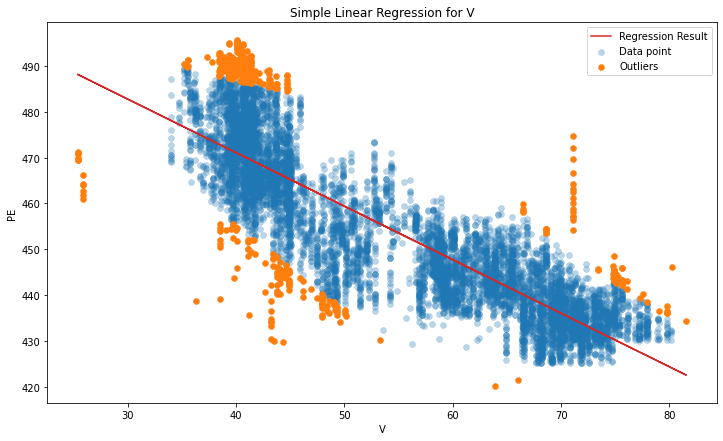

423


In [9]:
outlier_V, new_x, new_y = fit_model_and_summarize("V")
print(len(outlier_V.T))

In [10]:
x_constant = sm.add_constant(new_x, prepend=False)
model = sm.OLS(new_y, x_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                 3.612e+04
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:29:38   Log-Likelihood:                -31275.
No. Observations:                9145   AIC:                         6.255e+04
Df Residuals:                    9143   BIC:                         6.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.1666      0.006   -190.051      0.0

Results:
1. P-value for the predictor is 0.000 which is statistically significant, indicating that V is a good predictor of PE.
2. Number of Outliers in the data which can be removed are 423
3. R^2 value for the data without outliers is 0.798 as compared to the earlier value of 0.757, indicating that the outliers were indeed outliers.

#### AP vs PE


Summarizing Regression fit for AP

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:29:38   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1

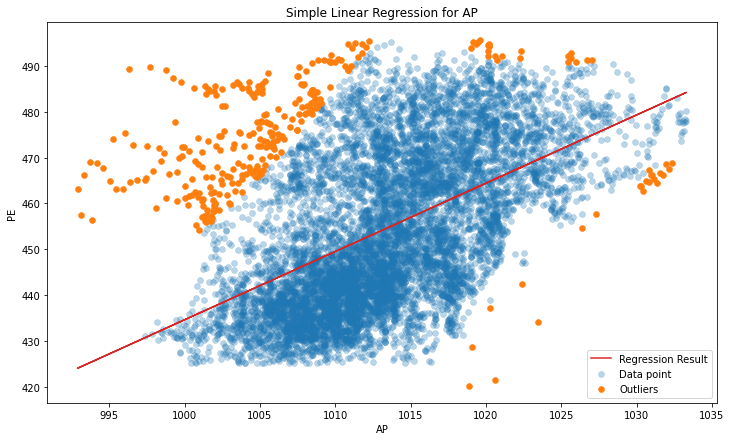

300


In [11]:
outlier_AP, new_x, new_y = fit_model_and_summarize("AP")
print(len(outlier_AP.T))

In [12]:
x_constant = sm.add_constant(new_x, prepend=False)
model = sm.OLS(new_y, x_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     5234.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:29:39   Log-Likelihood:                -37219.
No. Observations:                9268   AIC:                         7.444e+04
Df Residuals:                    9266   BIC:                         7.446e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.7648      0.024     72.346      0.0

Results:
1. P-value for the predictor is 0.000 which is statistically significant, indicating that AP is a good predictor of PE.
2. Number of Outliers in the data which can be removed are 300
3. R^2 value for the data without outliers is 0.361 as compared to the earlier value of 0.269, indicating that the outliers were indeed outliers.

#### RH vs PE


Summarizing Regression fit for RH

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:29:39   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0

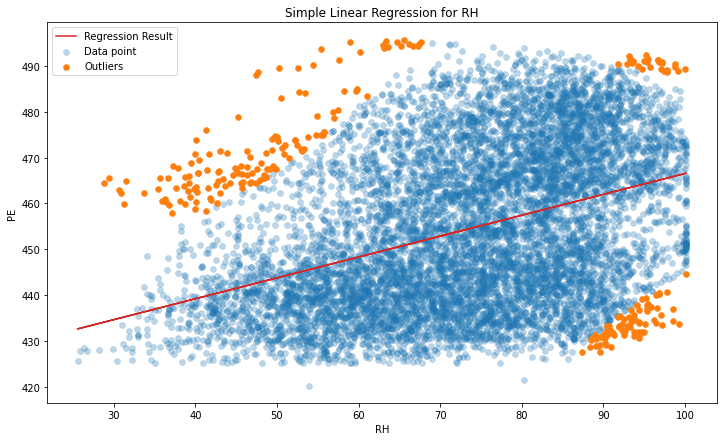

249


In [13]:
outlier_RH, new_x, new_y = fit_model_and_summarize("RH")
print(len(outlier_RH.T))

In [14]:
x_constant = sm.add_constant(new_x, prepend=False)
model = sm.OLS(new_y, x_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     2277.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:29:40   Log-Likelihood:                -38536.
No. Observations:                9319   AIC:                         7.708e+04
Df Residuals:                    9317   BIC:                         7.709e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5252      0.011     47.713      0.0

Results:
1. P-value for the predictor is 0.000 which is statistically significant, indicating that RH is a good predictor of PE.
2. Number of Outliers in the data which can be removed are 249
3. R^2 value for the data without outliers is 0.196 as compared to the earlier value of 0.152, indicating that the outliers were indeed outliers.

### (d) Multiple Regression

In [15]:
print(f"\nSummarizing Regression fit for All Variables\n")
# y = df["PE"].to_numpy()
# x = df.drop(df.columns[-1],axis=1).to_numpy()
# x_constant = sm.add_constant(x, prepend=False)
# model = sm.OLS(y, x_constant).fit()

formula = 'PE ~ AT + V + AP + RH'
model = smf.ols(formula, data=df).fit()
print(model.summary())


Summarizing Regression fit for All Variables

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:29:40   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Inter

Result: 
1. The Null hypothesis can be rejected for all the variables since p-value for all of them is ~ 0, indicating that all the predictors are statistically significant.
2. R^2 value is greater for this model as compared to the individual predictor models, indicating this model is a better predictor for the PE value.

### (e) 1c Compare to 1d

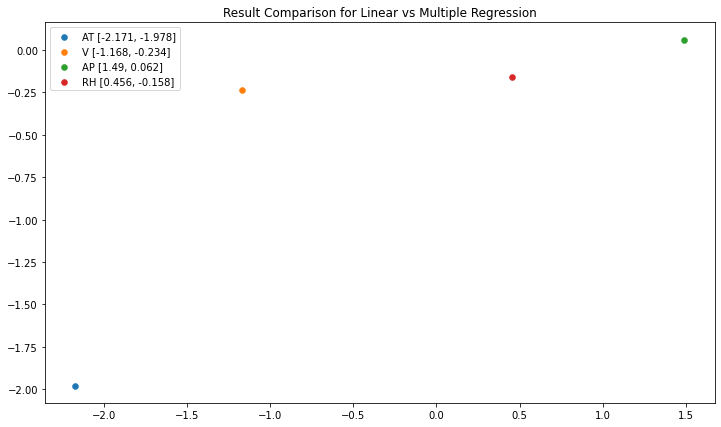

In [16]:
linear_coefficients = np.asarray(linear_coefficients).round(3)
multiple_coefficients = model.params[1:5].round(3)
fig, axes = plt.subplots(figsize=(12, 7))
with plt.style.context('ggplot'):
    axes.scatter(linear_coefficients[0], multiple_coefficients[0], label=f"AT [{linear_coefficients[0]}, {multiple_coefficients[0]}]")
    axes.scatter(linear_coefficients[1], multiple_coefficients[1], label=f"V [{linear_coefficients[1]}, {multiple_coefficients[1]}]")
    axes.scatter(linear_coefficients[2], multiple_coefficients[2], label=f"AP [{linear_coefficients[2]}, {multiple_coefficients[2]}]")
    axes.scatter(linear_coefficients[3], multiple_coefficients[3], label=f"RH [{linear_coefficients[3]}, {multiple_coefficients[3]}]")
axes.set_title(f"Result Comparison for Linear vs Multiple Regression")
axes.legend()
plt.show()

### (f) Nonlinear Association

In [17]:
def fit_nonlinear_model_and_summarize(col_name):
    poly_features = preprocessing.PolynomialFeatures(degree=3)
    # print(f"\nSummarizing Nonlinear Regression fit for {col_name}\n")
    # y = df["PE"].to_numpy()
    # x = df[col_name].to_numpy().reshape(-1, 1)
    # x = poly_features.fit_transform(x)
    # x_constant = sm.add_constant(x, prepend=False)
    # model = sm.OLS(y, x_constant).fit()

    formula = 'PE ~ '
    formula += col_name
    formula += '+ I('
    formula += col_name
    formula += '**2) + '
    formula += 'I('
    formula += col_name
    formula += '**3)'
    model = smf.ols(formula=formula, data=df).fit()
    print(model.summary())

In [18]:
fit_nonlinear_model_and_summarize("AT")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:29:40   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.673    732.248      0.0

Results:
1. The null hypothesis can be rejected for nonlinear predictors since p-value is 0.000 and hence there appears to be some evidence of non-linear association of AT with PE.

In [19]:
fit_nonlinear_model_and_summarize("V")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:29:41   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    554.1468      9.151     60.557      0.0

Results:
1. The null hypothesis can't be rejected for nonlinear predictors since p-value is significant and hence there appears is no significant evidence of non-linear association of V with PE.

In [20]:
fit_nonlinear_model_and_summarize("AP")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:29:41   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.0

Results:
1. The null hypothesis can be rejected for nonlinear predictors since p-value is 0.000 and hence there appears to be some evidence of non-linear association of AP with PE.

In [21]:
fit_nonlinear_model_and_summarize("RH")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:29:41   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    468.4135     10.545     44.422      0.0

Results:
1. The null hypothesis can be rejected for nonlinear predictors since p-value is 0.000 and hence there appears to be some evidence of non-linear association of RH with PE.

### (g) Interactions of Predictors

In [22]:
formula = 'PE ~ AT + V + AP + RH + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH'
model = smf.ols(formula = formula, data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:29:41   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

Results:
1. The V, AP, RH terms are statistically significant since their p-values are < 0.005
2. The interaction terms between (AT,V), (AT, RH), (V, AP), (AP, RH) are statistically significant since their p-values are < 0.005

### (h) Improvement

In [23]:
# Train Test Split
dic = {}
x = df.drop(df.columns[-1],axis=1)
y = df["PE"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [24]:
formula = 'PE ~ AT + V + AP + RH'
model = smf.ols(formula = formula, data = df).fit()
# print(model.summary())

y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

mse_test = mean_squared_error(y_test_predict, y_test)
mse_train = mean_squared_error(y_train_predict, y_train)

print("RESULTS: ")
print("Train MSE: ", mse_train.round(3))
print("Test MSE: ", mse_test.round(3))

dic["All Predictors Linear Regression"] = [mse_train.round(3), mse_test.round(3)]

RESULTS: 
Train MSE:  20.592
Test MSE:  21.176


In [25]:
formula = 'PE ~ AT + V + AP + RH + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH + np.power(AT, 2) + np.power(V, 2) + np.power(AP, 2) + np.power(RH, 2)'
model = smf.ols(formula = formula, data = df).fit()

y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

mse_test = mean_squared_error(y_test_predict, y_test)
mse_train = mean_squared_error(y_train_predict, y_train)

print("RESULTS: ")
print("Train MSE: ", mse_train.round(3))
print("Test MSE: ", mse_test.round(3))

dic["All Predictors, Interactions and Quadratic Terms Linear Regression"] = [mse_train.round(3), mse_test.round(3)]

RESULTS: 
Train MSE:  17.9
Test MSE:  18.576


In [26]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.030e+04
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:29:41   Log-Likelihood:                -27431.
No. Observations:                9568   AIC:                         5.489e+04
Df Residuals:                    9553   BIC:                         5.500e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7503.7323   1207.276     

Based on the Model Summary above, we can remove 4 terms:
1. AT : AP
2. V : AP
3. V : RH
4. V ** 2

Note: Although p-value for AT predictor is > 0.005 we cannot exclude it since it occurs in the interaction terms.

In [27]:
formula = 'PE ~ AT + V + AP + RH + AT:V + AT:RH + AP:RH + np.power(AT, 2) + np.power(AP, 2) + np.power(RH, 2)'
model = smf.ols(formula = formula, data = df).fit()

y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

mse_test = mean_squared_error(y_test_predict, y_test)
mse_train = mean_squared_error(y_train_predict, y_train)

print("RESULTS: ")
print("Train MSE: ", mse_train.round(3))
print("Test MSE: ", mse_test.round(3))

dic["All Significant Predictors Linear Regression"] = [mse_train.round(3), mse_test.round(3)]

RESULTS: 
Train MSE:  17.927
Test MSE:  18.642


### (i) KNN

In [28]:
def KNN(k_array, x_train, y_train, x_test, y_test):
    
    best_error = [1]
    best_k = [-1]
    
    training_error_data = []
    testing_error_data = []
    mse_train_data = []
    mse_test_data = []
            
    for i in k_array:
        
        knn = KNeighborsRegressor(n_neighbors = i)
        knn.fit(x_train, y_train)
        
        y_pred_train = knn.predict(x_train)
        y_pred_test = knn.predict(x_test)
        mse_train = mean_squared_error(y_pred_train, y_train)
        mse_test = mean_squared_error(y_pred_test, y_test)
        mse_train_data.append(mse_train)
        mse_test_data.append(mse_test)
        
        curr_score = knn.score(x_test, y_test)
        training_error = 1 - knn.score(x_train, y_train)
        testing_error  = 1 - knn.score(x_test, y_test)
        
        training_error_data.append(training_error)
        testing_error_data.append(testing_error)
        
        if (1-curr_score) < best_error[0]:
            best_error = [1-curr_score]
            best_k = [i]
        elif (1-curr_score) == best_error[0]:
            best_error.append(1-curr_score)
            best_k.append(i)
        
    return best_error, best_k, training_error_data, testing_error_data, mse_train_data, mse_test_data

Without Normalization

In [29]:
k_array = np.arange(1, 101, 1)
k_array_inverse = 1/k_array

best_error, best_k, training_error_data, testing_error_data, mse_train_data, mse_test_data = KNN(k_array, x_train, y_train, x_test, y_test)
min_mse_test = min(mse_test_data)
min_test_index = np.argmin(mse_test_data)
min_mse_train = mse_train_data[min_test_index]
print("MSE of KNN without normalization: ", min_mse_test.round(3))
print("Best K for KNN without normalization: ", best_k[0])

dic["KNN Without Normalization"] = [min_mse_train.round(3), min_mse_test.round(3)]

MSE of KNN without normalization:  15.727
Best K for KNN without normalization:  5


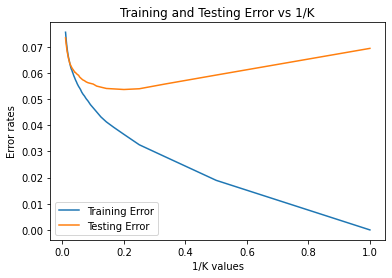

In [30]:
plt.plot(k_array_inverse, training_error_data, label='Training Error')
plt.plot(k_array_inverse, testing_error_data, label='Testing Error')
plt.xlabel('1/K values')
plt.ylabel('Error rates')
plt.title('Training and Testing Error vs 1/K')
plt.legend()
plt.show()

With Normalization

In [31]:
# def normalize_data(x, y):
#     scaling = preprocessing.MinMaxScaler()
#     x_scaled = scaling.fit_transform(x)
#     y_scaled = scaling.fit_transform(y.values.reshape(-1,1))
#     return x_scaled, y_scaled

def normalize_data(x):
    scaling = preprocessing.MinMaxScaler()
    x_scaled = scaling.fit_transform(x)
    return x_scaled

In [32]:
# x_train_scaled, y_train_scaled = normalize_data(x_train, y_train)
# x_test_scaled, y_test_scaled = normalize_data(x_test, y_test)\
x_train_scaled = normalize_data(x_train)
x_test_scaled = normalize_data(x_test)
k_array = np.arange(1, 101, 1)
k_array_inverse = 1/k_array

best_error, best_k, training_error_data, testing_error_data, mse_train_data, mse_test_data = KNN(k_array, x_train_scaled, y_train, x_test_scaled, y_test)
min_mse_test = min(mse_test_data)
min_test_index = np.argmin(mse_test_data)
min_mse_train = mse_train_data[min_test_index]
print("MSE of KNN with normalization: ", min_mse_test.round(3))
print("Best K for KNN with normalization: ", best_k[0])

dic["KNN With Normalization"] = [min_mse_train.round(3), min_mse_test.round(3)]

MSE of KNN with normalization:  17.034
Best K for KNN with normalization:  9


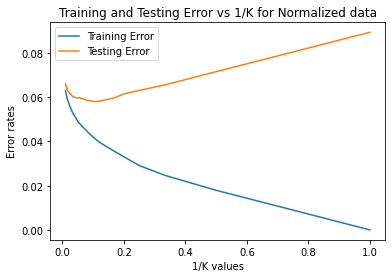

In [33]:
plt.plot(k_array_inverse, training_error_data, label='Training Error')
plt.plot(k_array_inverse, testing_error_data, label='Testing Error')
plt.xlabel('1/K values')
plt.ylabel('Error rates')
plt.title('Training and Testing Error vs 1/K for Normalized data')
plt.legend()
plt.show()

### (j ) Compare KNN and Linear

In [34]:
data = []
for k, v in dic.items():
    data.append([k, v[0], v[1]])
    
print(tabulate(data, headers=['Algorithm', 'MSE Train Error', 'MSE Test Error'], tablefmt='fancy_grid'))

╒════════════════════════════════════════════════════════════════════╤═══════════════════╤══════════════════╕
│ Algorithm                                                          │   MSE Train Error │   MSE Test Error │
╞════════════════════════════════════════════════════════════════════╪═══════════════════╪══════════════════╡
│ All Predictors Linear Regression                                   │            20.592 │           21.176 │
├────────────────────────────────────────────────────────────────────┼───────────────────┼──────────────────┤
│ All Predictors, Interactions and Quadratic Terms Linear Regression │            17.9   │           18.576 │
├────────────────────────────────────────────────────────────────────┼───────────────────┼──────────────────┤
│ All Significant Predictors Linear Regression                       │            17.927 │           18.642 │
├────────────────────────────────────────────────────────────────────┼───────────────────┼──────────────────┤
│ KNN With

##### We can see that the lowest test MSE with linear regression in 1(h) was <b> 18.576 </b>, while for KNN regression, lowest test MSE was <b> 15.727 </b>. Thus, by observing the MSE of test data, we can say that KNN regression is a better predictor for PE values than linear regression for our data set

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

<b>Flexible model is better</b><br>
Large sample size and small number of predictors can cause the inflexible model to underfit. Hence, a flexible model will perform better than an inflexible model.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

<b>Flexible model is worse</b><br>
Small sample size and large number of predictors can cause the flexible model to overfit the limited data. Hence, an inflexible model will perform better than a flexible model.

### (c) The relationship between the predictors and response is highly non-linear.

<b>Flexible model is better</b><br>
An inflexible model will not be able to adjust to the variances of a highly non-linear model and hence, a flexible model will perform better than a non-flexible model.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

<b>Flexible model is worse</b><br>
High variance indicates more noise meaning the flexible model will overfit. Hence, the inflexible model will perform better than a flexible model.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [35]:
data_points = [[0,3,0], [2,0,0], [0,1,3], [0,1,2], [-1,0,1], [1,1,1]]
classes = ["Red", "Red", "Red", "Green", "Green", "Red"]
test_point = [[0,0,0]]
distances = pairwise.euclidean_distances(data_points, test_point)
data = [[i+1, data_points[i], distances[i][0].round(2), classes[i]] for i in range(len(data_points))]
print(tabulate(data, headers=['Index', 'Data Point', 'Distance from Test Point', 'Class'], tablefmt='fancy_grid'))

╒═════════╤══════════════╤════════════════════════════╤═════════╕
│   Index │ Data Point   │   Distance from Test Point │ Class   │
╞═════════╪══════════════╪════════════════════════════╪═════════╡
│       1 │ [0, 3, 0]    │                       3    │ Red     │
├─────────┼──────────────┼────────────────────────────┼─────────┤
│       2 │ [2, 0, 0]    │                       2    │ Red     │
├─────────┼──────────────┼────────────────────────────┼─────────┤
│       3 │ [0, 1, 3]    │                       3.16 │ Red     │
├─────────┼──────────────┼────────────────────────────┼─────────┤
│       4 │ [0, 1, 2]    │                       2.24 │ Green   │
├─────────┼──────────────┼────────────────────────────┼─────────┤
│       5 │ [-1, 0, 1]   │                       1.41 │ Green   │
├─────────┼──────────────┼────────────────────────────┼─────────┤
│       6 │ [1, 1, 1]    │                       1.73 │ Red     │
╘═════════╧══════════════╧════════════════════════════╧═════════╛


### (b) What is our prediction with K = 1? Why?

<b>Green</b><br>
With K=1, we see that closest point is [-1,0,1] whose class is Green. Hence, the test point is classified as Green

### (c) What is our prediction with K = 3? Why?

<b>Red</b><br>
With K=3, we see that the closest 3 points are [2,0,0], [-1,0,1] and [1,1,1] whose classes are Red, Green and Red respectively. Hence, the test point is classified as Red.

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

<b>Small K</b><br>
As K increases, the flexibility of the model decreases, indicating a straighter boundary. But since the boundary is highly non-linear, it would indicate a small K

#### References

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html<br>
https://towardsdatascience.com/identifying-outliers-in-linear-regression-cooks-distance-9e212e9136a<br>
https://ostwalprasad.github.io/machine-learning/Polynomial-Regression-using-statsmodel.html<br>
https://www.statsmodels.org/devel/example_formulas.html<br>
https://stackoverflow.com/questions/31978948/python-stats-models-quadratic-term-in-regression<br>